In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  
import clamped_beam_wod as cbe
import sys

import keras
import keras.backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from keras.optimizers import Adam, SGD
from flexmbd.utils import rot

from random import randint
import tensorflow as tf


In [2]:
### For better gpu usage ###

configuration = tf.compat.v1.ConfigProto()
configuration.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=configuration)

In [3]:
## Function for dataframes ##

def dframefunc(force):
    
    ### Values for dataset creation, only force differs on each set###

    n_elem = 40
    l = 1
    h = 0.02
    E = 2e11
    nu = 0.3
    rho = 7801
    Fy = force
    f_array = []
    
    
    vals = cbe.generate(n_elem, l, h, E, nu, rho, Fy) ## Generating data
    
    
    a_length = len(vals[0][0]) +1 ## Lenght for force array


    for i in range(1, a_length): ## Creating force array
        f_array.append(Fy)
    
    
    dframe = pd.DataFrame()
    
    for i in range(len(vals[0])): ## Creating the dataframe out of generated data
        dframe[i] = pd.DataFrame(vals[0][i])
    
    dframe[50] = f_array ## adding force 1 to dframe

    return [dframe, vals[2], vals[1]]

FEM: end displacement is 25 mm, rotation 2.149 deg
MBD: end displacement is 24.966 mm, rotation 2.146 deg
10001
FEM: end displacement is 62.5 mm, rotation 5.371 deg
MBD: end displacement is 61.972 mm, rotation 5.335 deg
10001
FEM: end displacement is 100 mm, rotation 8.594 deg
MBD: end displacement is 97.899 mm, rotation 8.449 deg
10001
FEM: end displacement is 125 mm, rotation 10.74 deg
MBD: end displacement is 121 mm, rotation 10.47 deg
10001
Generating datasets done!


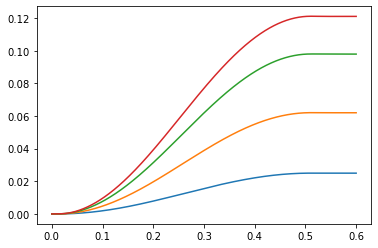

In [4]:
## Generating dataframes for model ##
dframe0 = dframefunc(200)[0]
dframe1 = dframefunc(500)[0]     
dframe2 = dframefunc(800)[0]
dframe3 = dframefunc(1000)[0]
print ( "Generating datasets done!" )

In [5]:
## Combining the dataframes ##

combined_valsX = pd.concat([dframe1.iloc[:-1], dframe2.iloc[:-1], dframe3.iloc[:-1], dframe0.iloc[:-1]]) ## drop the last for every simulation set as combining them
combined_valsY = pd.concat([dframe1.iloc[1: , :] , dframe2.iloc[1: , :], dframe3.iloc[1: , :], dframe0.iloc[1: , :]]) ## drop the first for every simulation set as combining them

## Inputs and outputs ##
X = combined_valsX
Y = combined_valsY
 

In [6]:
### CUSTOM LOSS FUNCTION ###

### using keras as backed for loss function ###

def custom_loss(y_true, y_pred):
    
    loss = K.square(y_pred - y_true) 
    loss = loss * 0.4
    
    
    return loss

In [148]:
### CREATING NN MODEL ###

model=Sequential([Dense(51,input_shape=(51,), activation="relu"),
                  Dense(64,activation="relu"),
                  Dense(64,activation="relu"),
                  Dense(51)])

model.compile(Adam(lr=0.00001),loss=tf.keras.losses.MeanSquaredError())

In [149]:
###TRAINING OF MODEL ###

history = model.fit(X, Y, epochs=1000, validation_split = 0.1, batch_size=32)

##callbacks= [keras.callbacks.EarlyStopping(patience=30)],

Epoch 1/1000
1125/1125 [==============================] - 1s 820us/step - loss: 9766.0791 - val_loss: 649.7720
Epoch 2/1000
1125/1125 [==============================] - 1s 671us/step - loss: 7050.2402 - val_loss: 378.0466
Epoch 3/1000
1125/1125 [==============================] - 1s 620us/step - loss: 3041.0730 - val_loss: 102.4395
Epoch 4/1000
1125/1125 [==============================] - 1s 626us/step - loss: 532.9656 - val_loss: 5.2264
Epoch 5/1000
1125/1125 [==============================] - 1s 670us/step - loss: 15.1810 - val_loss: 0.0252
Epoch 6/1000
1125/1125 [==============================] - 1s 664us/step - loss: 0.0265 - val_loss: 0.0347
Epoch 7/1000
1125/1125 [==============================] - 1s 621us/step - loss: 0.0097 - val_loss: 0.0344
Epoch 8/1000
1125/1125 [==============================] - 1s 604us/step - loss: 0.0096 - val_loss: 0.0337
Epoch 9/1000
1125/1125 [==============================] - 1s 735us/step - loss: 0.0094 - val_loss: 0.0334
Epoch 10/1000
1125/1125 [===

Epoch 145/1000
1125/1125 [==============================] - 1s 707us/step - loss: 2.6003e-05 - val_loss: 3.6273e-06
Epoch 146/1000
1125/1125 [==============================] - 1s 718us/step - loss: 2.2420e-05 - val_loss: 5.3020e-06
Epoch 147/1000
1125/1125 [==============================] - 1s 736us/step - loss: 2.3021e-05 - val_loss: 4.7412e-06
Epoch 148/1000
1125/1125 [==============================] - 1s 702us/step - loss: 2.3358e-05 - val_loss: 4.5416e-06
Epoch 149/1000
1125/1125 [==============================] - 1s 756us/step - loss: 2.3349e-05 - val_loss: 4.3182e-06
Epoch 150/1000
1125/1125 [==============================] - 1s 699us/step - loss: 2.3035e-05 - val_loss: 3.6088e-06
Epoch 151/1000
1125/1125 [==============================] - 1s 709us/step - loss: 2.4887e-05 - val_loss: 6.6392e-06
Epoch 152/1000
1125/1125 [==============================] - 1s 734us/step - loss: 2.1935e-05 - val_loss: 4.3446e-06
Epoch 153/1000
1125/1125 [==============================] - 1s 753us/ste

Epoch 286/1000
1125/1125 [==============================] - 1s 710us/step - loss: 2.2116e-05 - val_loss: 3.5060e-06
Epoch 287/1000
1125/1125 [==============================] - 1s 698us/step - loss: 2.1895e-05 - val_loss: 2.7234e-06
Epoch 288/1000
1125/1125 [==============================] - 1s 705us/step - loss: 2.2602e-05 - val_loss: 5.3026e-06
Epoch 289/1000
1125/1125 [==============================] - 1s 786us/step - loss: 2.0446e-05 - val_loss: 2.6745e-06
Epoch 290/1000
1125/1125 [==============================] - 1s 682us/step - loss: 2.5196e-05 - val_loss: 3.3091e-06
Epoch 291/1000
1125/1125 [==============================] - 1s 748us/step - loss: 1.9467e-05 - val_loss: 2.8366e-06
Epoch 292/1000
1125/1125 [==============================] - 1s 694us/step - loss: 2.3111e-05 - val_loss: 2.1203e-06
Epoch 293/1000
1125/1125 [==============================] - 1s 737us/step - loss: 2.0411e-05 - val_loss: 3.4549e-06
Epoch 294/1000
1125/1125 [==============================] - 1s 720us/ste

Epoch 427/1000
1125/1125 [==============================] - 1s 721us/step - loss: 2.2838e-05 - val_loss: 4.9950e-06
Epoch 428/1000
1125/1125 [==============================] - 1s 690us/step - loss: 1.7900e-05 - val_loss: 4.9183e-06
Epoch 429/1000
1125/1125 [==============================] - 1s 723us/step - loss: 1.9605e-05 - val_loss: 3.8461e-06
Epoch 430/1000
1125/1125 [==============================] - 1s 691us/step - loss: 1.9863e-05 - val_loss: 2.1084e-06
Epoch 431/1000
1125/1125 [==============================] - 1s 713us/step - loss: 2.2030e-05 - val_loss: 4.0285e-06
Epoch 432/1000
1125/1125 [==============================] - 1s 691us/step - loss: 2.0620e-05 - val_loss: 5.1396e-06
Epoch 433/1000
1125/1125 [==============================] - 1s 738us/step - loss: 1.7488e-05 - val_loss: 5.2618e-06
Epoch 434/1000
1125/1125 [==============================] - 1s 740us/step - loss: 2.0301e-05 - val_loss: 4.0672e-06
Epoch 435/1000
1125/1125 [==============================] - 1s 730us/ste

Epoch 568/1000
1125/1125 [==============================] - 1s 694us/step - loss: 1.5337e-05 - val_loss: 3.0158e-06
Epoch 569/1000
1125/1125 [==============================] - 1s 697us/step - loss: 1.6557e-05 - val_loss: 3.7235e-06
Epoch 570/1000
1125/1125 [==============================] - 1s 749us/step - loss: 1.7973e-05 - val_loss: 3.2941e-06
Epoch 571/1000
1125/1125 [==============================] - 1s 747us/step - loss: 1.5873e-05 - val_loss: 2.9039e-06
Epoch 572/1000
1125/1125 [==============================] - 1s 723us/step - loss: 1.9098e-05 - val_loss: 6.8331e-06
Epoch 573/1000
1125/1125 [==============================] - 1s 702us/step - loss: 1.7164e-05 - val_loss: 2.6427e-06
Epoch 574/1000
1125/1125 [==============================] - 1s 708us/step - loss: 1.7484e-05 - val_loss: 3.1230e-06
Epoch 575/1000
1125/1125 [==============================] - 1s 725us/step - loss: 1.5990e-05 - val_loss: 2.6759e-06
Epoch 576/1000
1125/1125 [==============================] - 1s 692us/ste

Epoch 709/1000
1125/1125 [==============================] - 1s 639us/step - loss: 1.5987e-05 - val_loss: 2.0614e-06
Epoch 710/1000
1125/1125 [==============================] - 1s 629us/step - loss: 1.4725e-05 - val_loss: 3.4555e-06
Epoch 711/1000
1125/1125 [==============================] - 1s 691us/step - loss: 1.3079e-05 - val_loss: 4.0853e-06
Epoch 712/1000
1125/1125 [==============================] - 1s 621us/step - loss: 1.8891e-05 - val_loss: 3.8822e-06
Epoch 713/1000
1125/1125 [==============================] - 1s 612us/step - loss: 1.3781e-05 - val_loss: 2.7573e-06
Epoch 714/1000
1125/1125 [==============================] - 1s 700us/step - loss: 1.3340e-05 - val_loss: 3.7007e-06
Epoch 715/1000
1125/1125 [==============================] - 1s 644us/step - loss: 1.6492e-05 - val_loss: 3.8882e-06
Epoch 716/1000
1125/1125 [==============================] - 1s 661us/step - loss: 1.3838e-05 - val_loss: 4.4041e-06
Epoch 717/1000
1125/1125 [==============================] - 1s 769us/ste

Epoch 850/1000
1125/1125 [==============================] - 1s 690us/step - loss: 1.4219e-05 - val_loss: 8.6447e-06
Epoch 851/1000
1125/1125 [==============================] - 1s 718us/step - loss: 1.2837e-05 - val_loss: 3.7486e-06
Epoch 852/1000
1125/1125 [==============================] - 1s 720us/step - loss: 1.3652e-05 - val_loss: 4.7515e-06
Epoch 853/1000
1125/1125 [==============================] - 1s 713us/step - loss: 1.5746e-05 - val_loss: 3.5052e-06
Epoch 854/1000
1125/1125 [==============================] - 1s 729us/step - loss: 1.3985e-05 - val_loss: 4.2707e-06
Epoch 855/1000
1125/1125 [==============================] - 1s 713us/step - loss: 1.5299e-05 - val_loss: 2.9930e-06
Epoch 856/1000
1125/1125 [==============================] - 1s 667us/step - loss: 1.5243e-05 - val_loss: 2.5879e-06
Epoch 857/1000
1125/1125 [==============================] - 1s 740us/step - loss: 1.2900e-05 - val_loss: 3.3383e-06
Epoch 858/1000
1125/1125 [==============================] - 1s 734us/ste

Epoch 991/1000
1125/1125 [==============================] - 1s 693us/step - loss: 1.7017e-05 - val_loss: 1.2207e-06
Epoch 992/1000
1125/1125 [==============================] - 1s 719us/step - loss: 1.3340e-05 - val_loss: 2.7667e-06
Epoch 993/1000
1125/1125 [==============================] - 1s 723us/step - loss: 1.6163e-05 - val_loss: 2.4404e-06
Epoch 994/1000
1125/1125 [==============================] - 1s 713us/step - loss: 1.0884e-05 - val_loss: 5.3282e-06
Epoch 995/1000
1125/1125 [==============================] - 1s 615us/step - loss: 1.5438e-05 - val_loss: 1.5523e-06
Epoch 996/1000
1125/1125 [==============================] - 1s 610us/step - loss: 1.1690e-05 - val_loss: 3.3502e-06
Epoch 997/1000
1125/1125 [==============================] - 1s 680us/step - loss: 1.4216e-05 - val_loss: 1.2373e-06
Epoch 998/1000
1125/1125 [==============================] - 1s 656us/step - loss: 1.3538e-05 - val_loss: 2.9967e-06
Epoch 999/1000
1125/1125 [==============================] - 1s 684us/ste

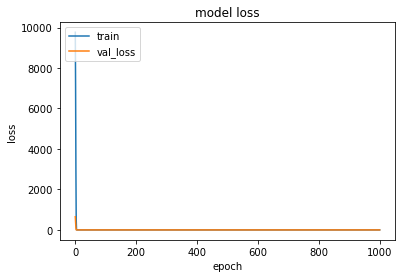

In [150]:
## Losses plotted ##

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'], loc='upper left')
plt.show()

FEM: end displacement is 75 mm, rotation 6.446 deg
MBD: end displacement is 74.095 mm, rotation 6.383 deg
10001


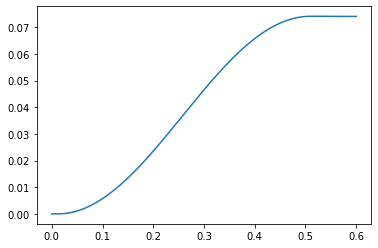

In [176]:
### Creating testing data ###
# Values are same as before except the Fy force #
    
dframe3, timeframe, sid = dframefunc(600)

X2 = dframe3.iloc[:-1]
Y2 = dframe3.iloc[1: , :]

In [177]:
#### Test ####
#np.set_printoptions(threshold=sys.maxsize)

results = model.evaluate(X, Y)
print(results)


xr = np.transpose(model.predict(np.array(X2)))
xr = xr[:-1] ##Deleting force array

1250/1250 [==============================] - 1s 551us/step - loss: 5.5264e-06
5.526409950107336e-06


In [178]:
### Calculating the displacements ###

test_vals = X2.T[:-1].to_numpy() ## Creating numpy array from testdata so we can calculate results ##

    # Real results #
    
ny = test_vals.shape[0] // 2 + 1
r_end = np.empty((3, test_vals.shape[1]))

for i in range(test_vals.shape[1]):
    u_last = sid.nodes[-1].origin @ test_vals[14:ny, i]
    A_fb = rot(test_vals[10:14, i])
    r_fb = test_vals[7:10, i]
    r = r_fb + A_fb @ u_last
    r_end[:, i] = r

    
    # Simulated results #

ny2 = xr.shape[0] // 2 + 1 ## +1?
r_end2 = np.empty((3, xr.shape[1]))

for i in range(xr.shape[1]):
    u_last2 = sid.nodes[-1].origin @ xr[14:ny2, i]
    A_fb2 = rot(xr[10:14, i])
    r_fb2 = xr[7:10, i]
    r2 = r_fb2 + A_fb2 @ u_last2
    r_end2[:, i] = r2


In [179]:
print (test_vals - xr)

[[-0.00049792 -0.00049792 -0.00049792 ...  0.00042302  0.00042302
   0.00042302]
 [ 0.00028863  0.00028863  0.00028863 ... -0.00043724 -0.00043343
  -0.00043343]
 [-0.00018746 -0.00018746 -0.00018746 ...  0.00048207  0.00048207
   0.00048207]
 ...
 [-0.00051399 -0.00051399 -0.00051399 ... -0.00126967 -0.00127157
  -0.00127157]
 [-0.00013076 -0.00013076 -0.00013076 ... -0.00017259 -0.0001726
  -0.0001726 ]
 [ 0.00053262  0.00053262  0.00053262 ...  0.00080919  0.00080919
   0.00080919]]


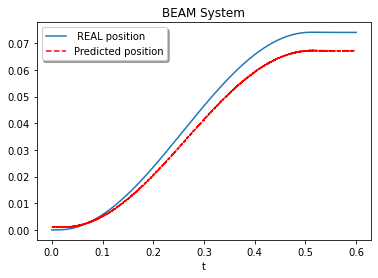

In [180]:
plt.plot(timeframe[:-1], r_end[1]) ## Timeframe is beign adjusted to sifting here
plt.plot(timeframe[:-1], r_end2[1], linestyle='dashed', color='red') ## Predicted position

plt.xlabel('t')
plt.legend([' REAL position',  'Predicted position'], shadow=True)
plt.title('BEAM System')
plt.show()